The goal of this notebook is to build a visualization of the Illiad using a recurrent theme of this epic work: the 

# Getting the text 

Fortunaly for us, we live in an age where 2500 year old epics can be found in digitial form. The Illiad can be found Project Gutenberg in a text form. Let's download it:

In [1]:
import requests

In [2]:
r = requests.get('http://www.gutenberg.org/cache/epub/2199/pg2199.txt')

In [36]:
illiad = r.text
illiad = illiad.replace('\r', '').replace('\n', ' ')

In [37]:
illiad[:100]

'\ufeffThe Project Gutenberg EBook of The Iliad, by Homer  This eBook is for the use of anyone anywhere at'

In [38]:
print(illiad[:1000])

﻿The Project Gutenberg EBook of The Iliad, by Homer  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Iliad  Author: Homer  Translator: Samuel Butler  Posting Date: June 13, 2010 [EBook #2199] Release Date: June, 2000 First Posted: September 18, 1999 Last Updated: December 12, 2004  Language: English   *** START OF THIS PROJECT GUTENBERG EBOOK THE ILIAD ***     Produced by Jim Tinsley.  HTML version by Al Haines.           THE ILIAD OF HOMER     Rendered into English Prose for   the use of those who cannot   read the original   by  Samuel Butler      BOOK I    The quarrel between Agamemnon and Achilles--Achilles withdraws   from the war, and sends his mother Thetis to ask Jove to help   the Trojans--Scene between Jove and Juno on Olympus.  Sing, O goddess, the anger of Achille

In [39]:
'\n' in illiad

False

Some sanity checks.

In [45]:
assert illiad.find('\n')
assert illiad.find('\r')

# Splitting into rhapsodies 

Now, let's split the Illiad in its different songs, or rhapsodies, since it is just a bunch of characters right now. We will use regular expressions to do this.

In [46]:
import re

In [91]:
rhapsodies = re.split(r'(?: BOOK [IVX]+\s+)', illiad)[1:]

Let's do some sanity checks:

In [92]:
len(rhapsodies)

24

In [96]:
from ipywidgets import interact
from IPython.display import HTML, display

In [97]:
@interact
def display_rhapsody_start(n=(0, 23)):
    display(HTML(rhapsodies[n][:200]))

In [98]:
for i in range(24):
    display_rhapsody_start(i)

Okay, this is all good. Let's move on to the next step: finding the names of sons mentioned in the rhapsodies.

# Looking for sons

In [99]:
rhapsody0 = rhapsodies[0]

In [111]:
re.findall(r'\w+\b[ ,]?sons? of (?:[A-Z][a-z]+)', rhapsody0)

['Achilles son of Peleus',
 'the son of Atreus',
 'the son of Jove',
 'the son of Atreus',
 'two sons of Atreus',
 'Calchas son of Thestor',
 'noble son of Atreus',
 'The son of Peleus',
 'the son of Atreus',
 'the son of Peleus',
 'the son of Peleus',
 'the son of Atreus',
 'the son of Peleus',
 'the son of Atreus',
 'Theseus son of Aegeus',
 'The son of Peleus',
 'the son of Menoetius',
 'the son of Atreus',
 'two sons of Atreus',
 'the son of Atreus',
 'the son of Saturn',
 'the son of Saturn',
 'mighty son of Saturn',
 'the son of Saturn',
 'Dread son of Saturn']

In [112]:
len(re.findall(r'\w+\b[ ,]?sons? of (?:[A-Z][a-z]+)', rhapsody0))

25

In [113]:
re.findall(r',?sons? of (?:[A-Z][a-z]+)', rhapsody0)

['son of Peleus',
 'son of Atreus',
 'son of Jove',
 'son of Atreus',
 'sons of Atreus',
 'son of Jove',
 'son of Thestor',
 'son of Atreus',
 'son of Peleus',
 'son of Peleus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'son of Aegeus',
 'son of Peleus',
 'son of Menoetius',
 'son of Atreus',
 'son of Peleus',
 'son of Atreus',
 'sons of Atreus',
 'son of Atreus',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn',
 'son of Saturn']

In [114]:
len(re.findall(r',?sons? of (?:[A-Z][a-z]+)', rhapsody0))

31

Let's use the second ordering.

In [117]:
from collections import OrderedDict

In [119]:
by_rhapsody = []
for rhapsody in rhapsodies:
    name_dict = OrderedDict()
    for name in re.findall(r',?sons? of (?:[A-Z][a-z]+)', rhapsody):
        if name in name_dict:
            name_dict[name] += 1
        else:
            name_dict[name] = 1
    by_rhapsody.append(name_dict)

# Graphing the output 

Let's now transform the output to a large sparse matrix. First we need to find all unique names. 

In [121]:
unique_names = []
for name_dict in by_rhapsody:
    for name in name_dict:
        if not name in unique_names:
            unique_names.append(name)

In [123]:
len(unique_names)

163

Now, let's build the matrix.

In [124]:
import numpy as np

In [125]:
name_matrix = np.zeros((len(rhapsodies), len(unique_names)), np.int)
for ind, name_dict in enumerate(by_rhapsody):
    for name in name_dict:
        name_matrix[ind, unique_names.index(name)] = name_dict[name]

Now, we can plot this:

In [126]:
import matplotlib.pyplot as plt

In [127]:
%matplotlib inline

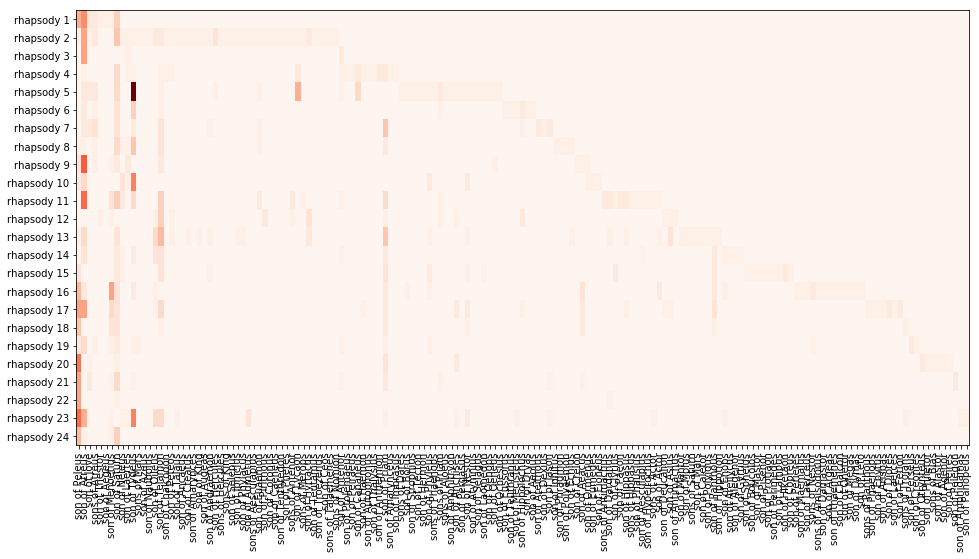

In [139]:
plt.figure(figsize=(16, 8))
plt.imshow(name_matrix, cmap='Reds', aspect='auto')
plt.xticks(np.arange(len(unique_names)), unique_names, rotation=90);
plt.yticks(np.arange(len(rhapsodies)), ['rhapsody {}'.format(i) for i in range(1, 25)]);

What about doing something like the [Les Mis graph found in the bokeh library examples](http://bokeh.pydata.org/en/latest/docs/gallery/les_mis.html)?

This time, we need to build an adjacency matrix.

In [149]:
adjacency = np.zeros((len(unique_names), len(unique_names)), np.int)
for name_dict in by_rhapsody:
    for name in unique_names:
        for other_name in name_dict:
            if name in name_dict:
                adjacency[unique_names.index(name), unique_names.index(other_name)] = name_dict[other_name] + name_dict[name]

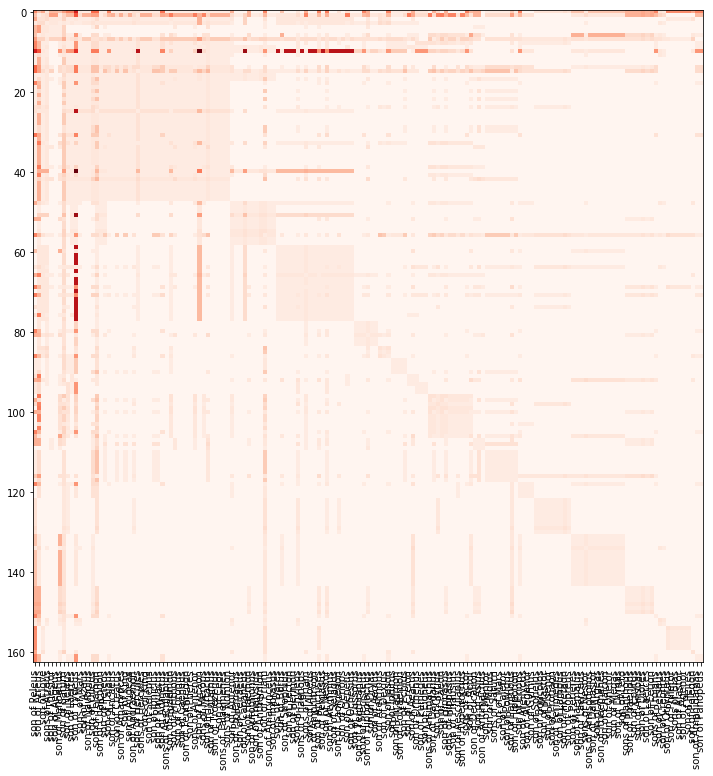

In [150]:
plt.figure(figsize=(12, 12))
plt.imshow(adjacency, cmap='Reds', aspect='auto')
plt.xticks(np.arange(len(unique_names)), unique_names, rotation=90);

We need to cluster this graph...

Let's try this.

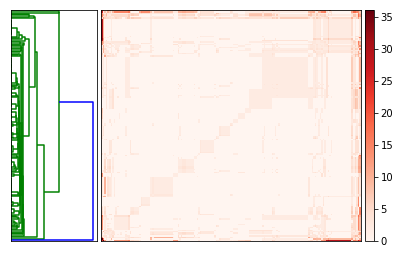

In [152]:
import scipy.cluster.hierarchy as sch

# Compute and plot dendrogram.
fig = plt.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(adjacency, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = adjacency[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap='Reds')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)


More research remains to be done.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

Other links:

https://de.dariah.eu/tatom/case_study_racine.html

https://de.dariah.eu/tatom/index.html

http://www.karsdorp.io/python-course/

https://bost.ocks.org/mike/miserables/

http://neoformix.com/2013/NovelViews.html